# One:
Register an app to get needed credentials ► https://developer.twitter.com/en/portal/petition/verification

Go to your App and generate an access token

## Hashtags or accounts related to potholes
"@mrpotholeuk",
"potholes",
"#PotholeDeaths",
"pothole damage".

## Hastags or accounts related to the solution
pothole detection

Related links https://www.teslarati.com/tesla-micro-maps-pothole-detection-update-elon-musk/

In [12]:
import tweepy
import json
import pandas as pd
from pandas.io.json import json_normalize 

In [7]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [8]:
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
data = api.me()

In [14]:

# function to convert _json to JSON
def jsonify_tweepy(tweepy_object):
    json_str = json.dumps(tweepy_object._json)
    return json.loads(json_str)

# function to get extended retweets
def jsonify_tweepy_2(tweet_info):

    if "retweeted_status" in dir(tweet_info):
      return tweet_info.retweeted_status.full_text
    else:
      return tweet_info.full_text

# df.iloc[row][col]

## Tweets from the account "@mrpotholeuk"

In [ ]:
mrpotholeuk_tweets = list(tweepy.Cursor(api.user_timeline, screen_name="mrpotholeuk", tweet_mode="extended").items(1000))

In [ ]:
mrpotholeuk_df = json_normalize([jsonify_tweepy(tweet) for tweet in mrpotholeuk_tweets])
mrpotholeuk_df.full_text = pd.DataFrame([jsonify_tweepy_2(tweet) for tweet in mrpotholeuk_tweets])

In [ ]:
mrpotholeuk_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.url.urls,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,...,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,retweeted_status.quoted_status.entities.media,retweeted_status.quoted_status.extended_entities.media,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,retweeted_status.quoted_status.quoted_status_permalink.url,retweeted_status.quoted_status.quoted_status_permalink.expanded,retweeted_status.quoted_status.quoted_status_permalink.display,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.quoted_status_permalink.url,quoted_status.quoted_status_permalink.expanded,quoted_status.quoted_status_permalink.display,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates
0,Sat Feb 13 22:50:25 +0000 2021,1360723026090872838,1360723026090872838,@MotorwaysKill Time for @grantshapps to #RedXS...,False,"[0, 140]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,None,None,None,None,False,3,0,False,False,en,"[{'text': 'RedXSlowLane', 'indices': [57, 70]}]",[],"[{'screen_name': 'mrpotholeuk', 'name': 'Mr Po...",[],1667340889,1667340889,Mr Pothole,mrpotholeuk,,World's Best know Pothole Campaigner! Media go...,https://t.co/xwa7V30Dgc,"[{'url': 'https://t.co/xwa7V30Dgc', 'expanded_...","[{'url': 'https://t.co/PCTDjjicPl', 'expanded_...",False,5917,4817,67,Tue Aug 13 09:22:29 +0000 2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Feb 13 22:23:53 +0000 2021,1360716351569072137,1360716351569072137,@1kilroywashere @mariannebirkby @crimlawuk @Su...,False,"[0, 140]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,None,None,None,None,False,10,0,False,False,en,[],[],"[{'screen_name': 'mrpotholeuk', 'name': 'Mr Po...",[],1667340889,1667340889,Mr Pothole,mrpotholeuk,,World's Best know Pothole Campaigner! Media go...,https://t.co/xwa7V30Dgc,"[{'url': 'https://t.co/xwa7V30Dgc', 'expanded_...","[{'url': 'https://t.co/PCTDjjicPl', 'expanded_...",False,5917,4817,67,Tue Aug 13 09:22:29 +0000 2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sat Feb 13 18:10:53 +0000 2021,1360652682189557764,1360652682189557764,@MotorwaysKill Time for @grantshapps to #RedXS...,False,"[15, 258]","<a href=""http://twitter.com/download/android"" ...",1.360640e+18,1360640292907548676,1.177709e+18,1177709329295822848,MotorwaysKill,None,None,None,None,False,3,3,False,False,en,"[{'text': 'RedXSlowLane', 'indices': [40, 53]}]",[],"[

In [ ]:
mrpotholeuk_df.to_csv(r'mrpotholeuk_df.csv')

## Tweets related to "potholes"

In [8]:
potholes_request = list(tweepy.Cursor(api.search, q="potholes", tweet_mode="extended").items(1500))

In [9]:
potholes_df = json_normalize([jsonify_tweepy(tweet) for tweet in potholes_request])
potholes_df.full_text = pd.DataFrame([jsonify_tweepy_2(tweet) for tweet in potholes_request])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [10]:
potholes_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,metadata.iso_language_code,metadata.result_type,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,...,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates,retweeted_status.entities.media,retweeted_status.extended_entities.media,retweeted_status.quoted_status.place.id,retweeted_status.quoted_status.place.url,retweeted_status.quoted_status.place.place_type,retweeted_status.quoted_status.place.name,retweeted_status.quoted_status.place.full_name,retweeted_status.quoted_status.place.country_code,retweeted_status.quoted_status.place.country,retweeted_status.quoted_status.place.contained_within,retweeted_status.quoted_status.place.bounding_box.type,retweeted_status.quoted_status.place.bounding_box.coordinates,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str
0,Tue Feb 16 01:43:58 +0000 2021,1361491478070112256,1361491478070112256,At least with all this snow I can’t tell how b...,False,"[0, 66]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,None,None,NaN,None,False,0,0,False,False,en,[],[],[],[],en,recent,1180002953761099776,1180002953761099776,Squalom,shel_tron,,,None,[],False,36,355,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Feb 16 01:43:35 +0000 2021,1361491382221832193,1361491382221832193,no one:\npuerto rican potholes: https://t.co/i...,False,"[0, 49]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,None,None,NaN,None,True,1,0,False,False,es,[],[],"[{'screen_name': 'la_meme_young', 'name': 'la_...",[],es,recent,371906213,371906213,V. Torres Montalvo 🧼,Motinsitepegas,Puerto Rico,News Assignment Desk @NoticentroWAPA 📺 | Forme...,https://t.co/cfkjsZhhb3,[],False,9746,1000,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tue Feb 16 01:43:32 +0000 2021,1361491370658127872,1361491370658127872,@RuizJesus19 @vioman1 Well that whole series i...,False,"[22, 64]","<a href=""http://twitter.com/download/android"" ...",1.361491e+18,1361490657894928385,1.289749e+18,1289748893782220800,RuizJesus19,None,None,NaN,None,False,0,1,False,False,en,[],[],"[{'screen_name': 'RuizJesus19', 'name': 'Ruiz ...",[],en,recent,1317643404780720129,1317643404780720129,"Son Chichi, Princess of Fire Mountain",Sonchichi5,"Fire Mountain, Mount Paozu","my name is son chichi, Wife of Goku, mother of...",None,[],False,616,764,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tue Feb 16 01:43:15 +0000 2021,1361491299728297987,1

In [11]:
potholes_df.to_csv(r'potholes_df1.csv')

## Tweets related to "pothole detection"

In [19]:
potholes_request = list(tweepy.Cursor(api.search, q="pothole detection", tweet_mode="extended").items(1200))

In [20]:
potholes_df = json_normalize([jsonify_tweepy(tweet) for tweet in potholes_request])
potholes_df.full_text = pd.DataFrame([jsonify_tweepy_2(tweet) for tweet in potholes_request])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [21]:
potholes_df.info

<bound method DataFrame.info of                        created_at  ...                            extended_entities.media
0  Tue Feb 16 07:55:37 +0000 2021  ...                                                NaN
1  Tue Feb 16 04:27:35 +0000 2021  ...                                                NaN
2  Mon Feb 15 19:06:00 +0000 2021  ...  [{'id': 1361322019229433857, 'id_str': '136132...
3  Fri Feb 12 15:59:42 +0000 2021  ...                                                NaN
4  Tue Feb 09 20:14:39 +0000 2021  ...                                                NaN
5  Tue Feb 09 16:39:45 +0000 2021  ...                                                NaN

[6 rows x 147 columns]>

## Executing sentiment analisis

In [2]:
!pip install langdetect

     |████████████████████████████████| 983kB 6.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=7b0a7533c011b2bd41d536eaefdb7214bdd5d82c50217956eaae1d37bbd443b2
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
import numpy as np
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# Loading the info
#tweets_full_info = pd.read_csv("potholes_df1.csv")
tweets_full_info = potholes_df

In [22]:
tweets = tweets_full_info.full_text

In [23]:
# For the new dataframe columns
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [24]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [25]:
noOfTweet = 1000

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [26]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1500
positive number:  608
negative number:  506
neutral number:  386


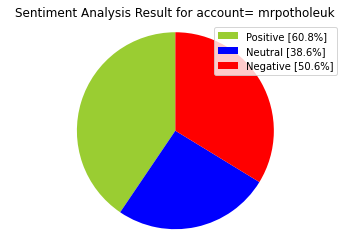

In [27]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for account= mrpotholeuk" )
plt.axis('equal')
plt.show()

In [28]:
tweet_list.drop_duplicates(inplace = True)

In [29]:

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,At least with all this snow I can’t tell how b...,At least with all this snow I can’t tell how b...
1,no one:\npuerto rican potholes: https://t.co/i...,no one:\npuerto rican potholes: https://t.co/i...
2,@RuizJesus19 @vioman1 Well that whole series i...,@RuizJesus19 @vioman1 Well that whole series i...
3,Tory cuts lead to millions being cut from high...,Tory cuts lead to millions being cut from high...
5,The parish won’t fill the potholes so the Lord...,The parish won’t fill the potholes so the Lord...
...,...,...
1484,@Shonny_RSA @SiyaNdlovu91 With potholes and all😅🤣,@Shonny_RSA @SiyaNdlovu91 With potholes and all😅🤣
1489,NEWS | #Herefordshire has been allocated its s...,NEWS | #Herefordshire has been allocated its s...
1490,@alistaircoleman Happy birthday! May your trou...,@alistaircoleman Happy birthday! May your trou...
1495,@retweetmy2cents @whatsnew9892 What I loved be...,@retweetmy2cents @whatsnew9892 What I loved be...


In [32]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,At least with all this snow I can’t tell how b...,at least with all this snow i can t tell how b...
1,no one:\npuerto rican potholes: https://t.co/i...,no one puerto rican potholes
2,@RuizJesus19 @vioman1 Well that whole series i...,well that whole series is full of potholes
3,Tory cuts lead to millions being cut from high...,tory cuts lead to millions being cut from high...
5,The parish won’t fill the potholes so the Lord...,the parish won t fill the potholes so the lord...
6,Isko Moreno thinks road potholes can wait in f...,isko moreno thinks road potholes can wait in f...
7,@jrdynjy But where does she live and why is sh...,but where does she live and why is she not a...
8,Compton I need you to get the potholes togethe...,compton i need you to get the potholes togethe...
9,@Joecoxactivist @philly311 @PhilaStreets @Phil...,so the city is liable for potholes i ...
10,And so it begins. Hello austerity my old frien...,and so it begins hello austerity my old frien...


In [33]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,At least with all this snow I can’t tell how b...,at least with all this snow i can t tell how b...,-0.500000,0.533333,negative,0.226,0.774,0.000,-0.5423
1,no one:\npuerto rican potholes: https://t.co/i...,no one puerto rican potholes,0.000000,0.000000,negative,0.355,0.645,0.000,-0.2960
2,@RuizJesus19 @vioman1 Well that whole series i...,well that whole series is full of potholes,0.275000,0.475000,positive,0.000,0.769,0.231,0.2732
3,Tory cuts lead to millions being cut from high...,tory cuts lead to millions being cut from high...,0.000000,0.000000,negative,0.236,0.764,0.000,-0.6705
5,The parish won’t fill the potholes so the Lord...,the parish won t fill the potholes so the lord...,0.000000,0.000000,positive,0.000,0.764,0.236,0.5719
6,Isko Moreno thinks road potholes can wait in f...,isko moreno thinks road potholes can wait in f...,0.000000,0.000000,positive,0.000,0.828,0.172,0.4019
7,@jrdynjy But where does she live and why is sh...,but where does she live and why is she not a...,0.218182,0.700000,neutral,0.000,1.000,0.000,0.0000
8,Compton I need you to get the potholes togethe...,compton i need you to get the potholes togethe...,0.000000,0.000000,positive,0.000,0.860,0.140,0.0772
9,@Joecoxactivist @philly311 @PhilaStreets @Phil...,so the city is liable for potholes i ...,-0.100000,0.200000,negative,0.062,0.879,0.059,-0.0258
10,And so it begins. Hello austerity my old frien...,and so it begins hello austerity my old frien...,0.100000,0.200000,positive,0.000,0.714,0.286,0.4939


In [34]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [35]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [36]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,330,37.08
negative,308,34.61
neutral,252,28.31


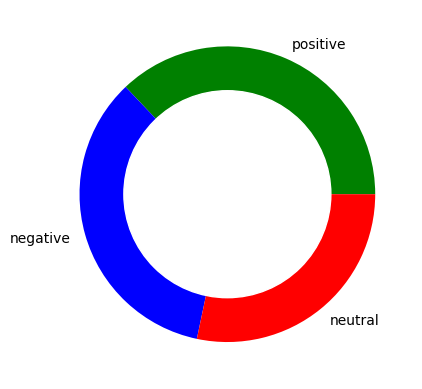

In [38]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [39]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


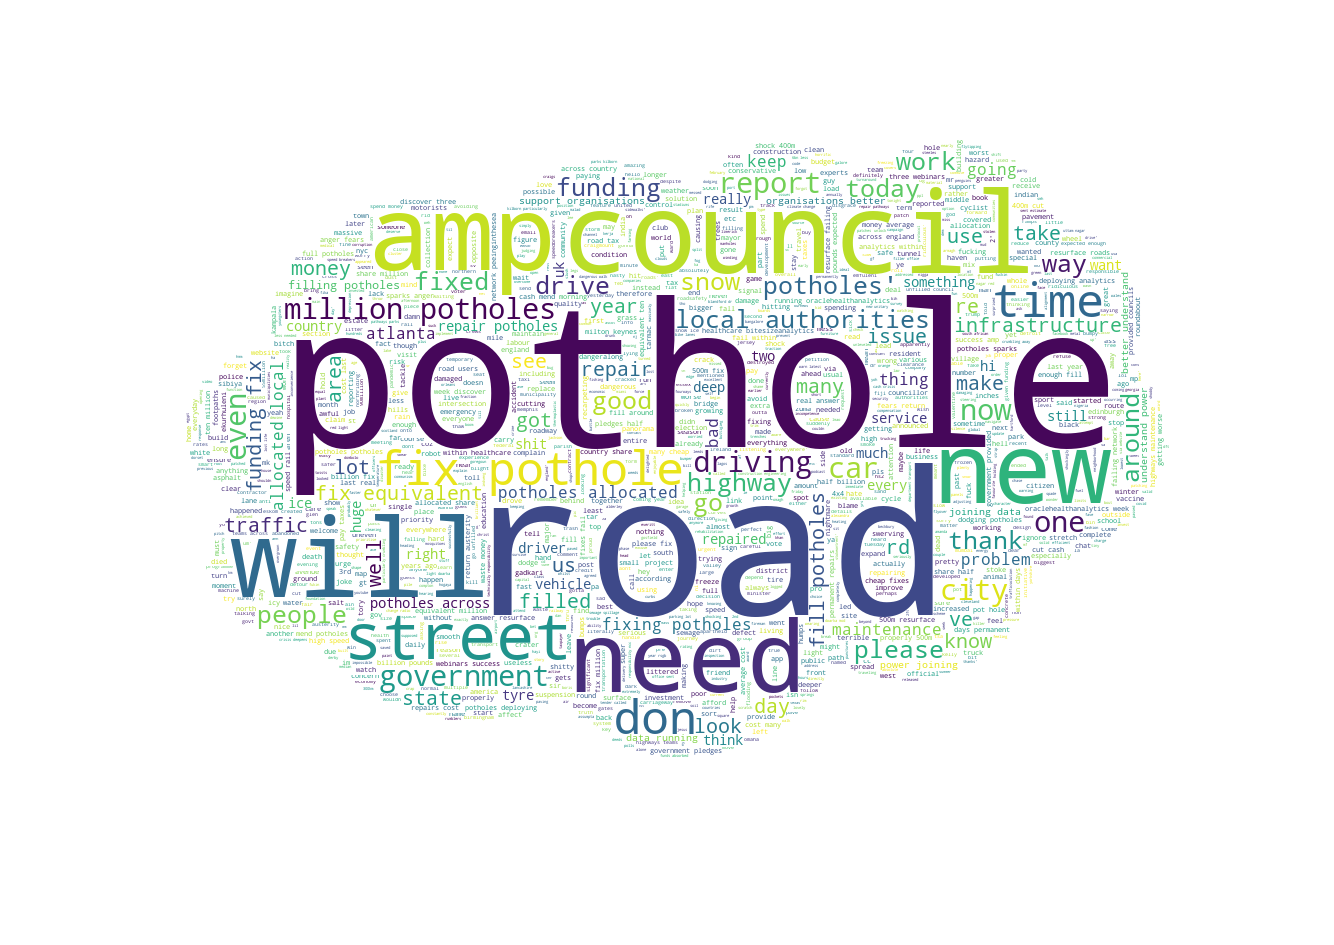

In [43]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


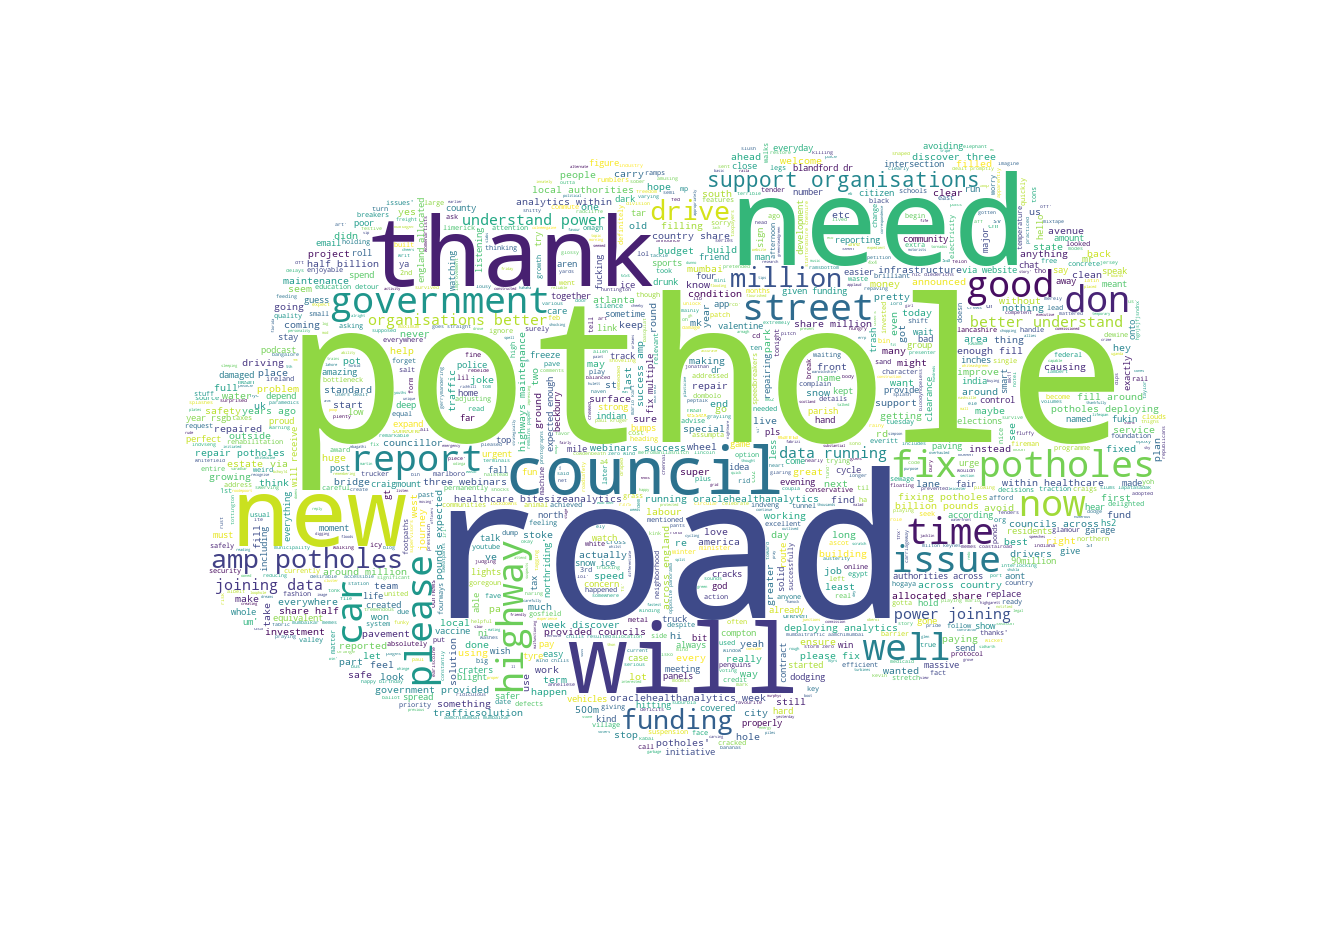

In [44]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


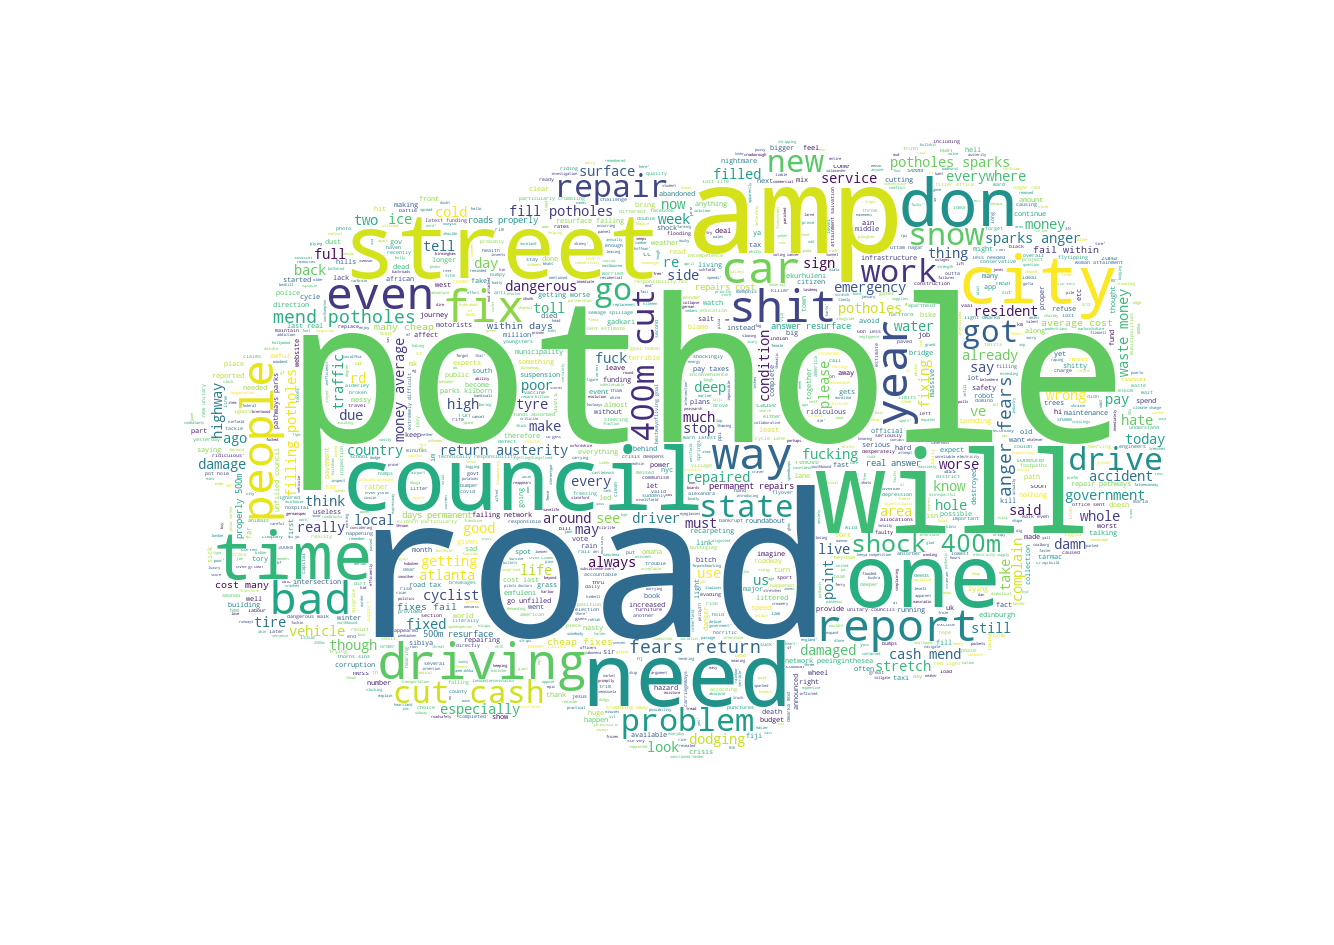

In [45]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


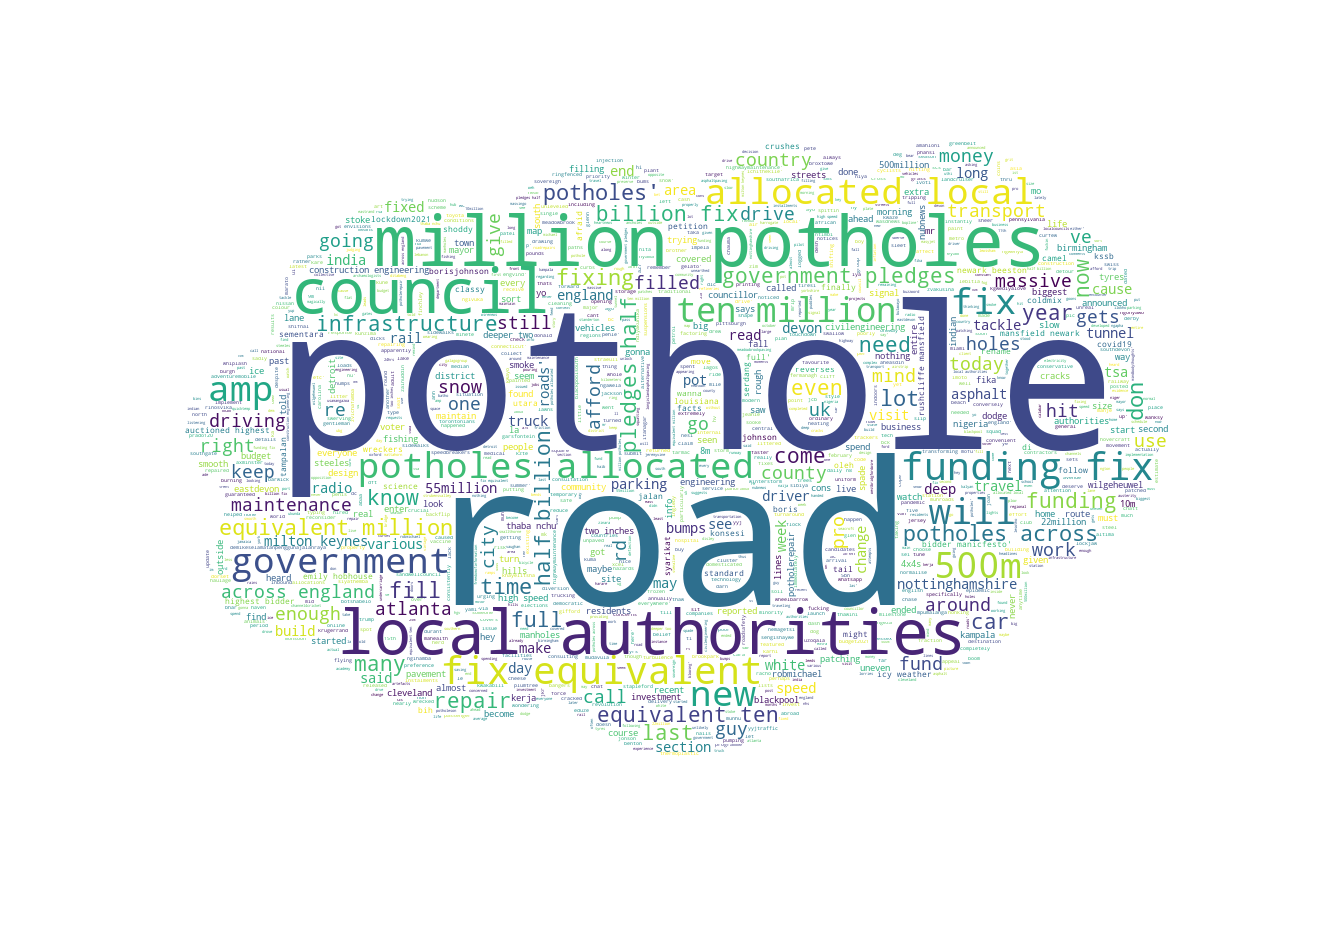

In [46]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [47]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [48]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,165.97
neutral,90.98
positive,162.72


In [49]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,28.53
neutral,14.47
positive,27.47


In [52]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [53]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [56]:

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [57]:

#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [58]:

#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [59]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,At least with all this snow I can’t tell how b...,at least with all this snow i can t tell how b...,-0.500,0.533333,negative,0.226,0.774,0.000,-0.5423,66,15,at least with all this snow i can t tell how b...,"[at, least, with, all, this, snow, i, can, t, ...","[least, snow, tell, bad, potholes, ]","[least, snow, tell, bad, pothol, ]"
1,no one:\npuerto rican potholes: https://t.co/i...,no one puerto rican potholes,0.000,0.000000,negative,0.355,0.645,0.000,-0.2960,32,5,no one puerto rican potholes,"[no, one, puerto, rican, potholes, ]","[one, puerto, rican, potholes, ]","[one, puerto, rican, pothol, ]"
2,@RuizJesus19 @vioman1 Well that whole series i...,well that whole series is full of potholes,0.275,0.475000,positive,0.000,0.769,0.231,0.2732,46,8,well that whole series is full of potholes,"[, well, that, whole, series, is, full, of, po...","[, well, whole, series, full, potholes]","[, well, whole, seri, full, pothol]"
3,Tory cuts lead to millions being cut from high...,tory cuts lead to millions being cut from high...,0.000,0.000000,negative,0.236,0.764,0.000,-0.6705,133,24,tory cuts lead to millions being cut from high...,"[tory, cuts, lead, to, millions, being, cut, f...","[tory, cuts, lead, millions, cut, highway, rep...","[tori, cut, lead, million, cut, highway, repai..."
5,The parish won’t fill the potholes so the Lord...,the parish won t fill the potholes so the lord...,0.000,0.000000,positive,0.000,0.764,0.236,0.5719,60,14,the parish won t fill the potholes so the lord...,"[the, parish, won, t, fill, the, potholes, so,...","[parish, fill, potholes, lord, us]","[parish, fill, pothol, lord, us]"


In [60]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

890 Number of reviews has 3398 words


In [61]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,aamchimumbai,abaa,abamnyama,abandon,abantu,abhiyan,abil,abl,abroad,absolut,absorb,absoutl,abstract,ac,academ,academi,accept,access,accid,accord,account,accumul,accur,ace,achiev,acknowledg,across,action,activ,actual,ad,add,addict,addit,address,ade,adequ,adjust,...,ya,yall,yami,yard,ye,yeah,year,yearoficonicwinnersid,yecarwash,yemen,yep,yese,yess,yesterday,yet,yo,yoh,york,yorkshir,young,youngster,youth,youtub,yr,yup,yyj,yyjtraff,za,zainuddin,zap,zbra,zee,zero,zim,zinara,zone,zuma,zvakusina,zvecarwash,zvichafamba
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
pothol,937
road,335
fix,168
million,92
council,88
get,84
fill,77
repair,76
amp,74
like,72


In [63]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [64]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('fix potholes', 48),
 ('million potholes', 44),
 ('local authorities', 33),
 ('10 million', 33),
 ('fix equivalent', 23),
 ('funding fix', 22),
 ('fixing potholes', 20),
 ('amp potholes', 19),
 ('potholes allocated', 19),
 ('roads potholes', 18),
 ('allocated local', 18),
 ('500 million', 17),
 ('repair potholes', 17),
 ('potholes roads', 17),
 ('road potholes', 16),
 ('potholes road', 15),
 ('filling potholes', 14),
 ('report potholes', 14),
 ('support organisations', 14),
 ('organisations better', 14)]

In [65]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('10 million potholes', 31),
 ('funding fix equivalent', 20),
 ('million potholes allocated', 18),
 ('allocated local authorities', 18),
 ('potholes allocated local', 17),
 ('support organisations better', 14),
 ('organisations better understand', 14),
 ('better understand power', 14),
 ('understand power joining', 14),
 ('power joining data', 14),
 ('joining data running', 14),
 ('data running oraclehealthanalytics', 14),
 ('running oraclehealthanalytics week', 14),
 ('oraclehealthanalytics week discover', 14),
 ('week discover webinars', 14),
 ('discover webinars success', 14),
 ('webinars success amp', 14),
 ('success amp potholes', 14),
 ('amp potholes deploying', 14),
 ('potholes deploying analytics', 14)]